In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join

from PRmm.fixture import Fixture
from PRmm.extras.hqrfHmm import loadBazViewerHDF5

%matplotlib inline
%load_ext ipycache

/Users/dalexander/.virtualenvs/VE-Qt/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/dalexander/.virtualenvs/VE-Qt/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
from pbcore.io import *
from PRmm.io import *

TRACE="/pbi/collections/315/3150096/r54012_20160217_001918/1_A01/m54012_160217_002459.trc.h5"
SUBREADS_BAM="/pbi/collections/315/3150096/r54012_20160217_001918/1_A01/m54012_160217_002459.subreads.bam"
FILTERED_FASTA = "/home/UNIXHOME/aklammer/bugs/31434/ecoli_analysis/filtered.fasta.fasta"
ALIGNED_M4 = "/home/UNIXHOME/aklammer/bugs/31434/ecoli_analysis/filtered_align.m4"

trcF = TrcH5Reader(TRACE)
roiHoles = set(trcF.holeNumbers)

subreadsF = IndexedBamReader(SUBREADS_BAM)

alnF = M4Reader(ALIGNED_M4)

#fx = Fixture(trcFname=TRACE, basFname=SUBREADS_BAM)
fx = Fixture.fromIniFile("aaronsBug.ini", "RefarmedInternal")

# Task: find reads 1) among the filtered set from Aaron 2) which are in the trace ROI 3) that do not align.

In [3]:
%%cache mycache.pkl qnamesFiltered

qnamesFiltered = set([ r.name for r in FastaReader(FILTERED_FASTA) ])

[Skipped the cell's code and loaded variables qnamesFiltered from file '/Users/dalexander/Dropbox/Sources/git/PRmm/notebooks/HQRF/mycache.pkl'.]


In [4]:
# Work around the stupidity of qname in BLASR M4 output... truncate the last trailing /...
qnamesAligned = set([ re.sub("/(\d+)_(\d+)$", "", r.qName)
                      for r in alnF ])

qnamesFilterButDontAlign = set.difference(qnamesFiltered, qnamesAligned)

hnsFilterButDontAlign = [ int(qname.split("/")[1]) for qname in qnamesFilterButDontAlign ] 

holesToInspect = set.intersection(set(hnsFilterButDontAlign), roiHoles)

In [5]:
metricsDf = loadBazViewerHDF5("/home/UNIXHOME/dalexander/Projects/Bugs/31434-TooMuchUnmappable/metrics.h5")
hns = metricsDf.ZmwNumber.unique()
hn0 = hns[0]
metrics0 = metricsDf[metricsDf.ZmwNumber==hn0]

10944700
[<Region:     INSERT       0     718>, <Region:         HQ       0     718>]


<function __main__.plotMetricsP>

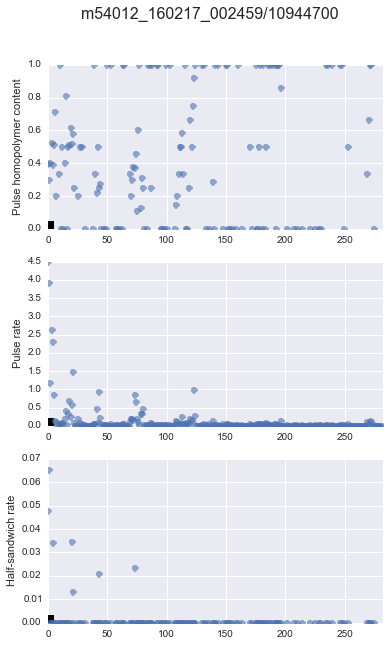

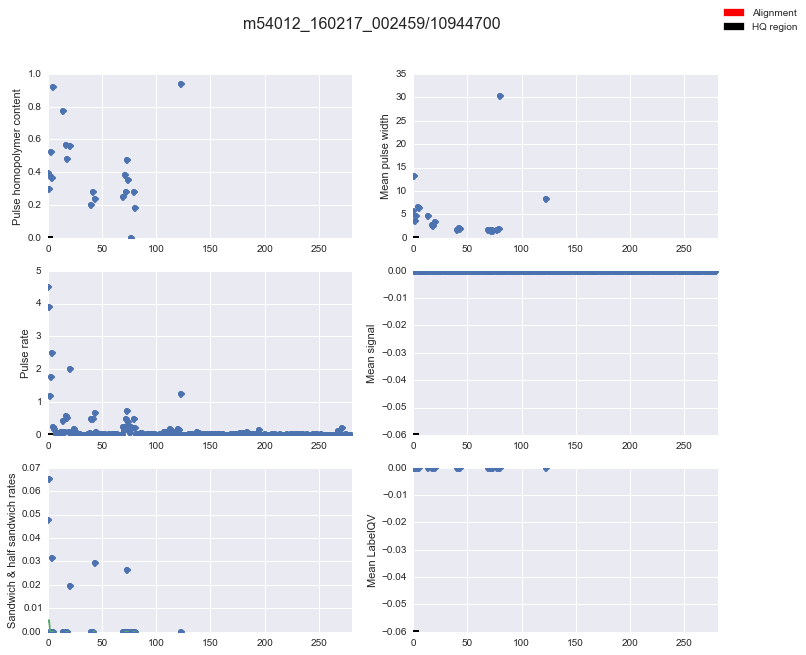

In [15]:
from PRmm.extras.activityPlots import hdf5MetricsPlot
from PRmm.extras.activityPlots import plotMetrics
from ipywidgets import *

def plotMetricsP(hnString):
    hn = int(hnString)
    zz = fx[hn]
    hdf5MetricsPlot(metricsDf, hn, fx)
    plotMetrics(zz)
    print hn
    print zz.baseRegions

hnW = Select(options=map(str, hns))

interact(plotMetricsP, hnString=hnW)

In [7]:
#selectedHn = int(hnW.selected_label)
def selectedHn():
    return int(hnW.selected_label)

def z():
    return fx[selectedHn()]

def metricsZ():
    return metricsDf[metricsDf.ZmwNumber == selectedHn()]
    
#selectedHn = 28639650
#selectedHnMetrics = metricsDf[metricsDf.ZmwNumber == selectedHn]

In [14]:
selectedHn()

11075768